In [31]:
import pandas as pd
import numpy as np   
import seaborn as sns
import matplotlib.pyplot as plt

# Use seaborn's default graphing theme
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")

In [32]:
data=pd.read_excel("data/final2.xlsx")

data.head()

,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Year Code,Type
0,Facebook,35.0,65.0,49.0,40.0,5.0,3.0,3.0,1.00,NaN,5,Social Media
1,Instagram,35.0,65.0,49.0,40.0,5.0,3.0,3.0,1.00,NaN,5,Social Media
2,Google+,31.0,69.0,56.0,35.0,4.0,2.0,4.0,1.00,NaN,5,Social Media
3,YouTube,31.0,69.0,56.0,35.0,4.0,2.0,4.0,1.00,NaN,5,Social Media
4,LinkedIn,42.0,58.0,52.0,39.0,4.0,4.0,2.0,0.01,NaN,5,Social Media


Which Type of data? Tech Companies


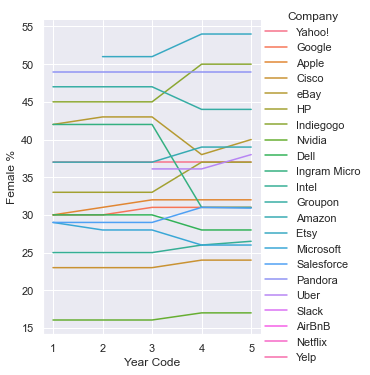

In [33]:
column = input("Which Type of data? ")

if not column:
    column = "Tech Companies"

sns.relplot(
    data=data[data["Type"] == column],
    x="Year Code", y="Female %",
    hue="Company",
    kind="line",
    height=5, aspect=.75
)

In [24]:
## This script graphs the change of percentage of women in a company over time

def female_percentage_change(comp=False):
    if not comp: comp = "Cisco"
    
    ## Filter for only the relevant cols and sort by year
    filtered = data[["Female %", "Year Code"]][data["Company"]==comp].sort_values(by=["Year Code"], ascending=True)
    
    #Get the change in years for that particular company:
    ## Filtered only the Female % otherwise the % change of year code would be calculated (we dont want that)
    change = filtered.pct_change()
    
    ## Add the Year Code back in after the % change operation is done:
    change["Year Code"] = filtered["Year Code"]

    if not change.empty:
        sns.barplot(x="Year Code", y="Female %", data=change)
        plt.show()
    else:
        print("That was an empty DataFrame")

In [25]:
## This script takes a company name and looks at its percentage over time:

def female_percentage(comp=False):
    ## Get a name of a company
    if not comp: comp = "Cisco"
    
    ## Filter for only the relevant cols and sort by year
    filtered = data[["Female %", "Year Code"]][data["Company"]==comp].sort_values(by=["Year Code"], ascending=True)

    if not filtered.empty:
        sns.barplot(x="Year Code", y="Female %", data=filtered)
        plt.show()
    else:
        print("That was an empty DataFrame")

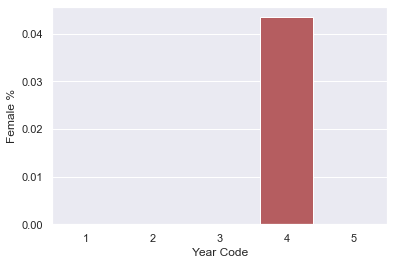

In [40]:
female_percentage_change("Cisco")

In [7]:
## This script compares a companies Female % in year X with the average population in that year X aswell

def compare_against_typical(year=5):
    ## Array of all the companies in the specified year:
    list_of_comps = data[(data["Year Code"]==year)]["Company"].array
    
    ## Get the year that I want
    filt = (data["Year Code"]==year)
    comp_fem = data[filt]
    
    ## Filter only the Female % of that company
    comp_fem = comp_fem["Female %"]
    
    ## Get the typical female % in a population for a year
    filt = (data['Year Code']==year) & (data['Type']=="Typical Population")
    typ_fem = data[filt]
    
    ## Get only the female % from there.
    typ_fem = typ_fem["Female %"]
    
    ## Ensure that theyre both dataframes and reset the indexes
    comp_fem = pd.DataFrame(comp_fem)
    comp_fem.reset_index(drop=True, inplace=True)
    typ_fem = pd.DataFrame(typ_fem)
    typ_fem.reset_index(drop=True, inplace=True)
    
    ## Make a long list of "company" to add as a new column
    kind=[]
    for i in range(0, len(comp_fem)):
        kind.append("Company")
    
    ## Add that long column to the company_female DataFrame
    comp_fem["Kind"] = kind
    comp_fem["Company"] = list_of_comps

    ## Create a long list of "typical" to add as a new column
    kind=[]
    percentage = []
    for i in range(0, len(comp_fem)):
        kind.append("Typical")
        percentage.append(typ_fem["Female %"][0])
    
    typ_fem = pd.DataFrame({"Female %" : percentage, "Kind" : kind, "Company" : list_of_comps})
    
    combined = typ_fem.append(comp_fem)
    
    sns.catplot(x="Female %", y="Company", hue="Kind", kind="bar", data=combined)
        

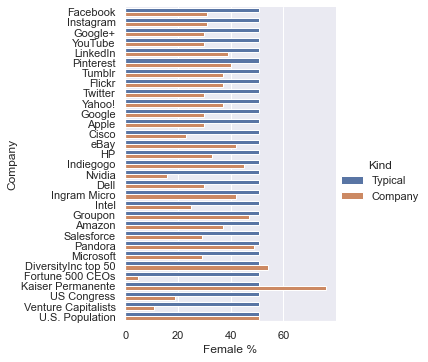

In [8]:
compare_against_typical(1)

In [ ]:
## This script return the mean % of Female employed in year x
pd.DataFrame(data)


def mean_year(year=1):
    year = data[(data["Year Code"]==year)]
    year = year["Female %"]
    return year.mean()

In [ ]:
mean_year()

In [ ]:
## This returns the typical female % of the population in a given year

def female_pop(year=1):
    year = data[(data["Year Code"]==year)]
    year = year[data["Type"]=="Typical Population"]
    return year["Female %"].mean()

In [ ]:
female_pop(5)

In [ ]:
mean_year(5)

In [ ]:
## This returns the typical female % of the population in a given year

def female_pop(year=1):
    year = data[(data["Year Code"]==year)]
    year = year[data["Type"]=="Typical Population"]
    return year["Female %"].mean()

In [41]:
female_pop(5)

51.0

In [42]:
mean_year(5)

36.27571428571429

In [11]:
## This returns the typical female % of the population in a given year

def female_pop(year=1):
    year = data[(data["Year Code"]==year)]
    year = year[data["Type"]=="Typical Population"]
    return year["Female %"].mean()

In [13]:
female_pop(5)

51.0